In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
update_nums = [1, 2, 3]
update_formats = ['per', 'num', 'rate']

# 1: [[1,2,3],[1,3,2],[1,3,2],[3,1,2],[3,1,2]],
# 2: [[3,1,2],[1,3,2],[3,1,2],[1,2,3],[3,2,1]],
# 3: [[1,3,2],[3,1,2],[3,2,1],[2,3,1],[3,2,1]]

per_updates = { 1: [[25,31,44],[13,62,25],[17,50,33],[55,21,23],[55,19,24]], 
                2: [[44,25,31],[13,62,25],[50,17,33],[21,23,55],[55,24,19]],
                3: [[25,44,31],[62,13,25],[50,33,17],[23,55,21],[55,24,19]],
              }

num_updates = { 1: [[8,16,33],[13,62,25],[67,327,121],[32,18,31],[17,4,11]], 
                2: [[33,8,16],[13,62,25],[327,67,121],[18,31,32],[17,11,4]], 
                3: [[8,33,16],[62,13,25],[327,121,67],[31,32,18],[17,11,4]]
              }

rate_updates = { 1: [[8,10,16],[14,41,21],[57,173,154],[75,21,67],[151,58,72]], 
                 2: [[16,8,10],[14,41,21],[173,57,154],[21,67,75],[151,72,58]], 
                 3: [[8,16,10],[41,14,21],[173,154,57],[67,75,21],[151,72,58]]
               }

In [4]:
which_safest = ["Blicket", "Dax", "Wug"]
columns_safest = { 'Blicket': ("Blicket", "Dax", "Wug"), 
                   'Dax': ("Dax", "Wug", "Blicket"), 
                   'Wug': ("Wug", "Blicket", "Dax")
                 }

In [5]:
rows_format = { 'per': ("% occupant death due to a vehicle rollover caused by right turn", "% occupant deaths due to rollover crashes in ice/ frost condition on road", "% occupant death in rollover crashes in blowing snow atmospheric conditions", "% of occupant deaths in single vehicle crashes", "% of occupant deaths in 2019")[::-1], 
                'num': ("# of Drivers killed on colliding with crash cushions", "# of Drivers killed in crashes in rural areas in 2019", "# of Drivers killed on collision with concrete barrier", "# of Drivers killed in rollover crashes with no initial impact", "# of Drivers killed on collision with utility pole")[::-1], 
                'rate': ("Driver death rate* for crashes involving very large sized vehicles", "Driver death rate* for multi-vehicle crashes involving small size vehicles", "Driver death rate* for crashes involving young drivers (age 15 - 20)", "Driver death rate* on collision with tree", "Driver death rate* for crashes involving alcohol impaired drivers")[::-1]
              }
#footnote for rate
footer='*Driver death rate is defined as deaths per million registered vehicle'

In [6]:
def create_fig(update, row_labels, col_labels, title, footer): 

    # Create the figure. Setting a small pad on tight_layout
    # seems to better regulate white space. Sometimes experimenting
    # with an explicit figsize here can produce better outcome.
    plt.figure(linewidth=2,
               tight_layout={'pad':1},
               figsize=(15,2)
              )

    # All the tables- generated one update at a time and one sequence at a time
    # Counter balance condition 1 (Blicket Safety_First Update Percentage_Second Update Number_Third Update Rate)
    the_table = plt.table(cellText=update,
                          rowLabels=row_labels,
                          rowLoc='left',
                          colLabels=col_labels,
                          loc='center',cellLoc='center')

    # Add footer for rate data only
    plt.figtext(0.10, 0.01, footer, horizontalalignment='left', size=8, weight='light')

    # Scaling is the only influence we have over top and bottom cell padding.
    # Make the rows taller (i.e., make cell y scale larger).
    the_table.scale(1, 1.5)

    # Hide axes
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Hide axes border
    plt.box(on=None)

    # Create image. plt.savefig ignores figure edge and face colors, so map them.
    fig = plt.gcf()
    plt.savefig(title + '.png',
                #bbox='tight',
                dpi=150
                )

    plt.show()





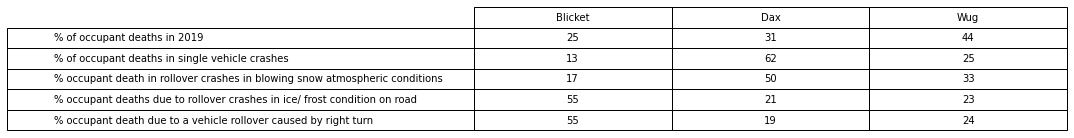

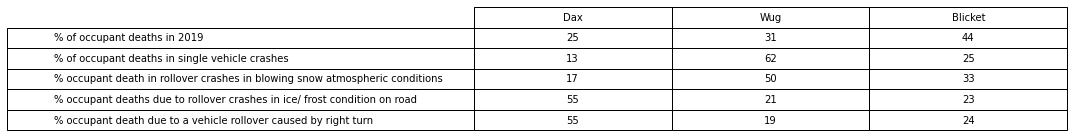

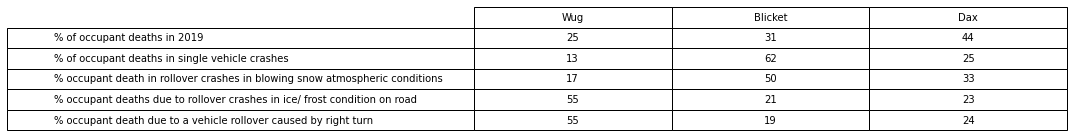

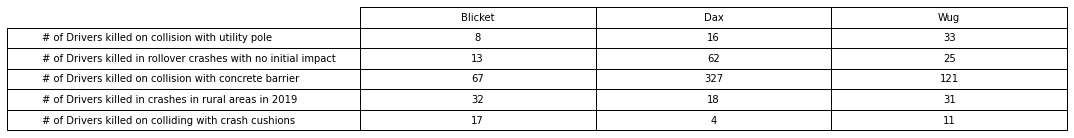

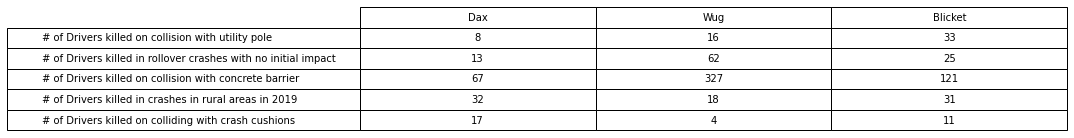

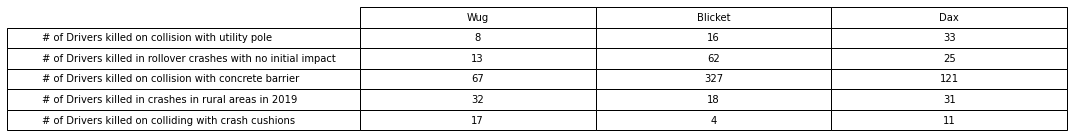

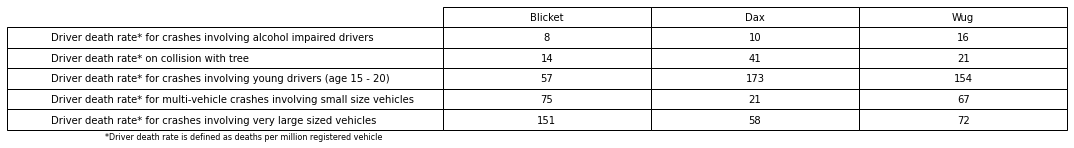

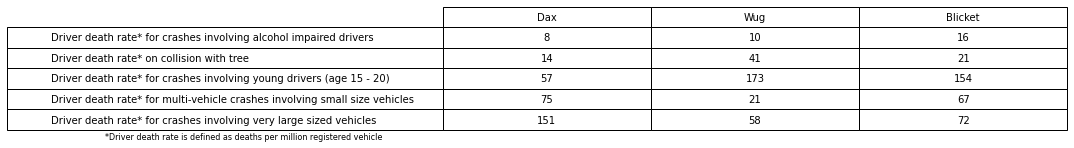

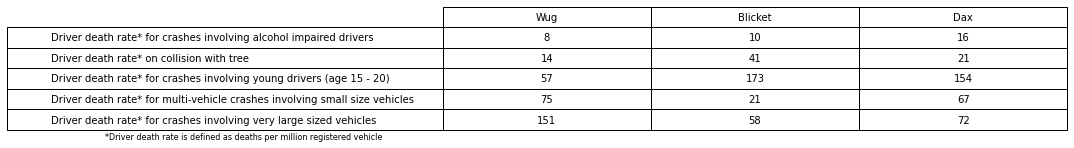

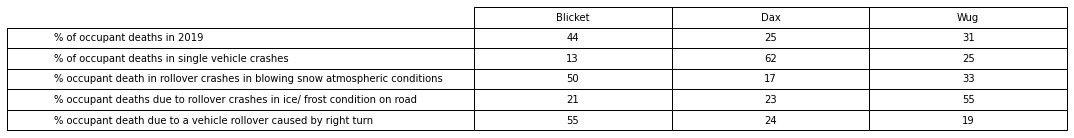

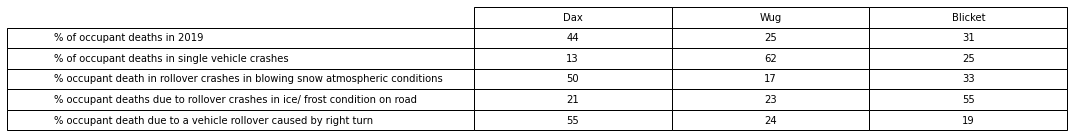

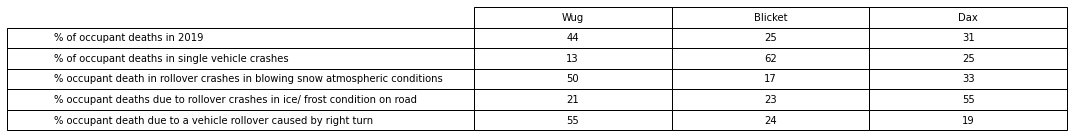

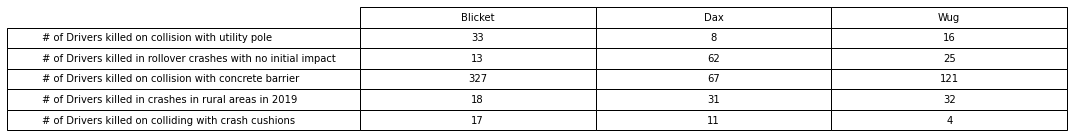

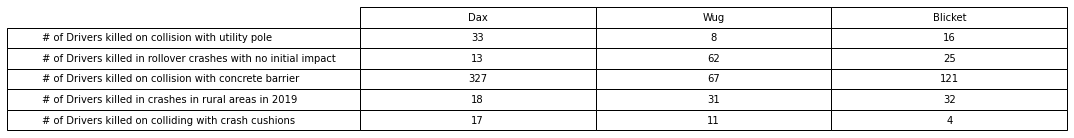

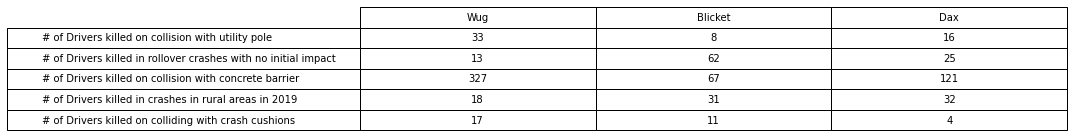

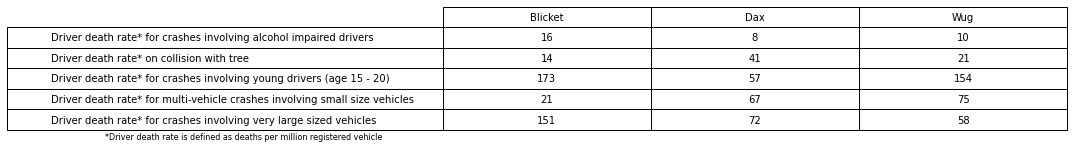

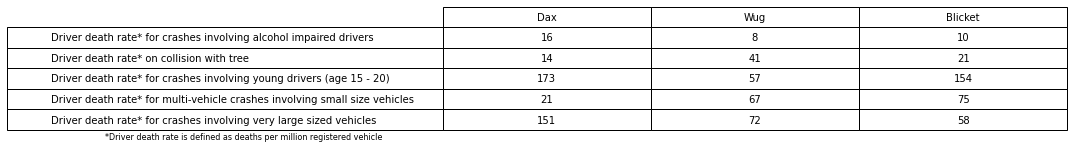

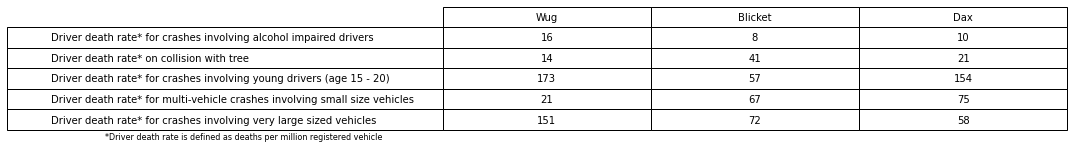

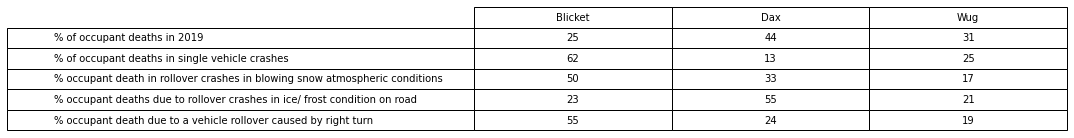

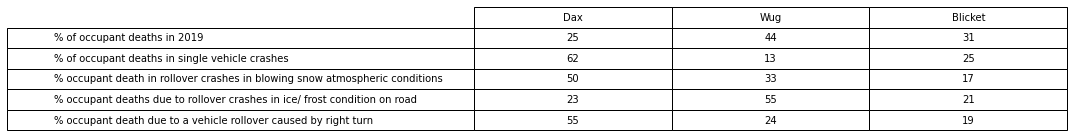

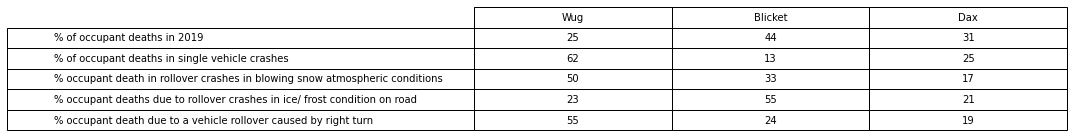

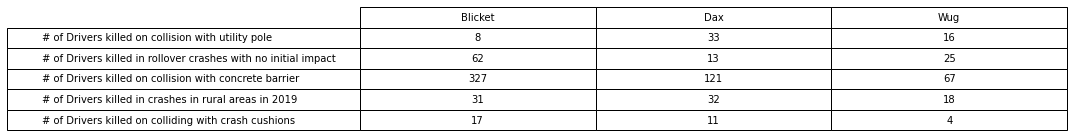

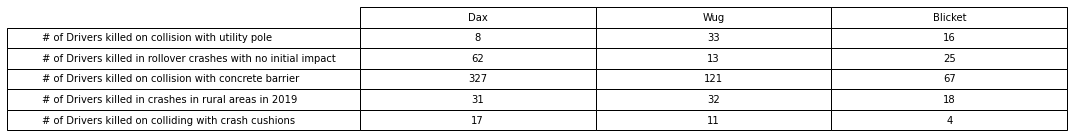

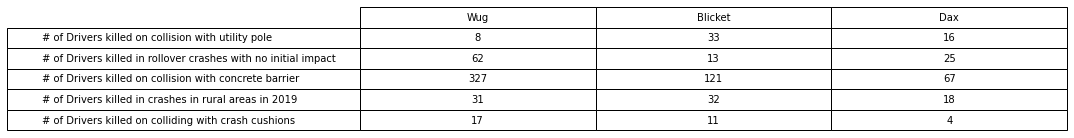

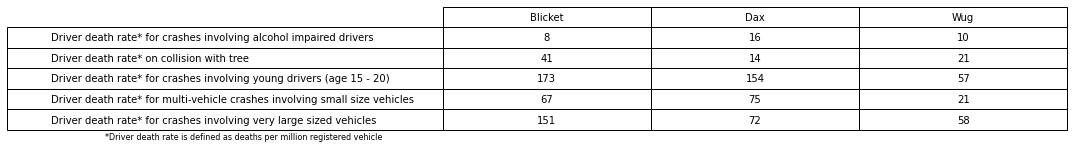

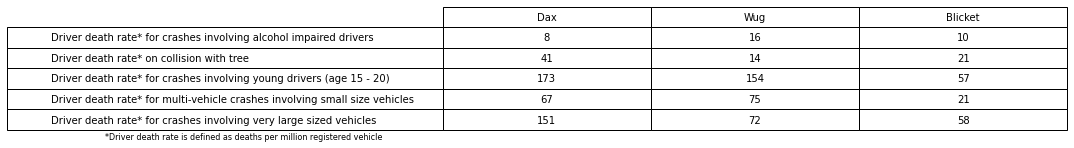

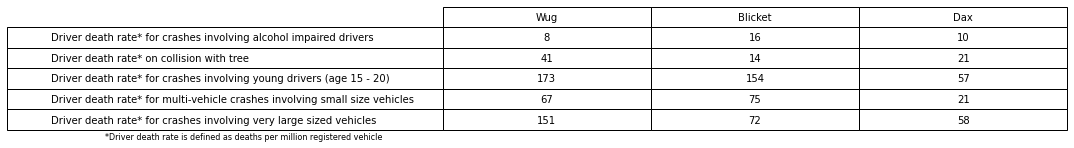

In [7]:
for num in update_nums: # produce table for update 1, 2, 3
    for update_format in update_formats: # for each update, vary by format
        if (update_format == 'per'): 
            updates = per_updates[num]
            footnote = None
        elif (update_format == 'num'):
            updates = num_updates[num]
            footnote = None
        elif (update_format == 'rate'):
            updates = rate_updates[num]
            footnote = footer
            
        for safest in which_safest: # for each update and format, vary which car is safest
            columns = columns_safest[safest]
            rows = rows_format[update_format]

            create_fig(updates, rows, columns, safest + '_' + str(num) + '_' + update_format, footnote)

##### 